# Задание 1


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from sklearn.metrics import recall_score , precision_score, accuracy_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import display

In [5]:
# read file
data1 = pd.read_csv('bank-additional-full.csv', sep=';')

In [6]:
# print the size of the DataFrame (number of rows and columns)
print(f"Размерность: {data1.shape}")

Размерность: (41188, 21)


In [7]:
# display the first 5 lines and last 5 lines of Data
first_5 = data1.head(5)
last_5 = data1.tail(5)

print("Первые 5 записей:")
display(first_5.style)

print("Последние 5 записей:")
display(last_5.style)

Первые 5 записей:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


Последние 5 записей:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.100000,94.767000,-50.800000,1.028000,4963.600000,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.100000,94.767000,-50.800000,1.028000,4963.600000,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.100000,94.767000,-50.800000,1.028000,4963.600000,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.100000,94.767000,-50.800000,1.028000,4963.600000,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.100000,94.767000,-50.800000,1.028000,4963.600000,no


In [8]:
# provides basic statistical information for numeric columns in the Data
data1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
# check number of missing values ​​in each column
data1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
# list the values ​​in each column
print(f"job: {data1['job'].unique()}")
print(f"marital: {data1['marital'].unique()}")
print(f"education: {data1['education'].unique()}")
print(f"default: {data1['default'].unique()}")
print(f"housing: {data1['housing'].unique()}")
print(f"loan: {data1['loan'].unique()}")
print(f"contact: {data1['contact'].unique()}")
print(f"month: {data1['month'].unique()}")
print(f"day_of_week: {data1['day_of_week'].unique()}")
print(f"duration: {data1['duration'].unique()}")
print(f"pdays: {data1['pdays'].unique()}")
print(f"previous: {data1['previous'].unique()}")
print(f"poutcome: {data1['poutcome'].unique()}")
print(f"emp.var.rate: {data1['emp.var.rate'].unique()}")
print(f"cons.price.idx: {data1['cons.price.idx'].unique()}")
print(f"cons.conf.idx: {data1['cons.conf.idx'].unique()}")
print(f"euribor3m: {data1['euribor3m'].unique()}")
print(f"nr.employed: {data1['nr.employed'].unique()}")
print(f"y: {data1['y'].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
duration: [ 261  149  226 ... 1246 1556 1868]
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous: [0 1 2 3 4 5 6 7]
poutcome: ['nonexistent' 'failure' 'success']
emp.var.rate: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx: [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 

In [12]:
# convert value to number
dict = {'yes':1,'no':0,'unknown':0}
data1['default'] = data1['default'].map(dict)
dict = {'yes':1,'no':0,'unknown':0}
data1['housing'] = data1['housing'].map(dict)
data1['loan'] = data1['loan'].map(dict)
data1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
dict = {'success':1,'failure':0,'nonexistent':0}
data1['poutcome'] = data1['poutcome'].map(dict)
data1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# count the number of each value in column y
data1['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [15]:
# map the values ​​in column y of the DataFrame to binary values ​​and store the result in the new column binY
y_dict = {'yes':1, 'no':0}
data1['binY'] = data1['y'].map(y_dict)
data1[['y','binY']].head(10)

,y,binY
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
5,no,0
6,no,0
7,no,0
8,no,0
9,no,0


In [16]:
# prepare data for machine learning model
# X - Data containing features selected from data1
X = data1[['age','default','housing','loan','duration','poutcome','cons.price.idx','cons.conf.idx','euribor3m']]
# y - Series containing the target variable
y = data1['binY']

In [17]:
# normalize the features (X) so that all values ​​are in the range [0,1]
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X

array([[0.48148148, 0.        , 0.        , ..., 0.69875292, 0.60251046,
        0.95737928],
       [0.49382716, 0.        , 0.        , ..., 0.69875292, 0.60251046,
        0.95737928],
       [0.24691358, 0.        , 1.        , ..., 0.69875292, 0.60251046,
        0.95737928],
       ...,
       [0.48148148, 0.        , 1.        , ..., 1.        , 0.        ,
        0.08932215],
       [0.33333333, 0.        , 0.        , ..., 1.        , 0.        ,
        0.08932215],
       [0.7037037 , 0.        , 1.        , ..., 1.        , 0.        ,
        0.08932215]])

In [18]:
#split the data set X and y into 3 sets: train, validation and test
from sklearn.model_selection import train_test_split
# split data into train and test
# 30% of the original data is used as the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3,random_state = 0)

print(f'Train + Validation: {X_train.shape}, Test: {X_test.shape}')
# split the training data into training and validation
# 30% of the training set is used as validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.3, random_state = 0)

Train + Validation: (28831, 9), Test: (12357, 9)


In [19]:
print(f'Train : {X_train.shape}')
print(f'Validation : {X_val.shape}')
print(f'Test : {X_test.shape}')

Train : (20181, 9)
Validation : (8650, 9)
Test : (12357, 9)


In [20]:
# build and train neural networks
# use Sequential API in Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

bin_model = Sequential([
    Input(shape=(X_train.shape[1],)),   # Input layer with number of features equal to number of columns of X_train
    Dense(4, activation='relu'), # Hidden layer with 4 units, ReLU activation function
    Dense(1, activation='sigmoid')# Output layer with 1 unit, sigmoid activation function
])

In [21]:
bin_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45 (180.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# compile model in keras
bin_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# train the model and save the training history
history = bin_model.fit(X_train, y_train, epochs=90, batch_size=9, validation_data=(X_val, y_val))
# epochs - number of iterations over the entire training data
# batch_size - number of samples in each batch (mini-batch)
history_dict = history.history
# loss - training set loss for each epoch
# accuracy - training set accuracy
# val_loss - validation set loss for each epoch
# val_accuracy - validation set accuracy

Epoch 1/90
2243/2243 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8606 - loss: 0.4225 - val_accuracy: 0.8978 - val_loss: 0.2841
Epoch 2/90
2243/2243 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.8972 - loss: 0.2775 - val_accuracy: 0.8992 - val_loss: 0.2628
Epoch 3/90
2243/2243 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.9021 - loss: 0.2531 - val_accuracy: 0.9003 - val_loss: 0.2453
Epoch 4/90
2243/2243 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9017 - loss: 0.2417 - val_accuracy: 0.9036 - val_loss: 0.2343
Epoch 5/90
2243/2243 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.9082 - loss: 0.2223 - val_accuracy: 0.9065 - val_loss: 0.2280
Epoch 6/90
2243/2243 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.9064 - loss: 0.2268 - val_accuracy: 0.9088 - val_loss: 0.2273
Epoch 7/90
2243/2243 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.9127 - loss: 0.2125 - val_accuracy: 0.9087 - val_loss: 0.2247
Epoch 8/90
2243/2243 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.9097 -

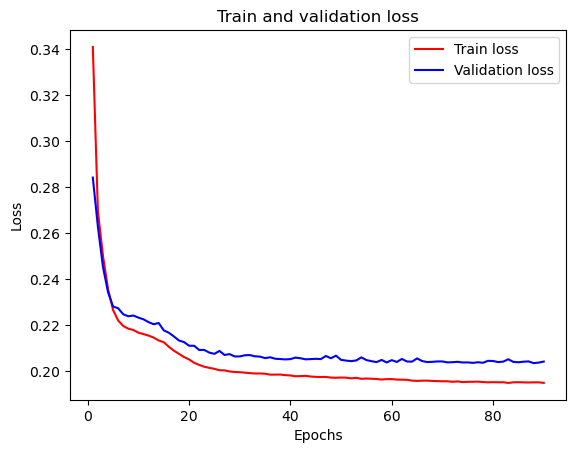

In [24]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Train loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

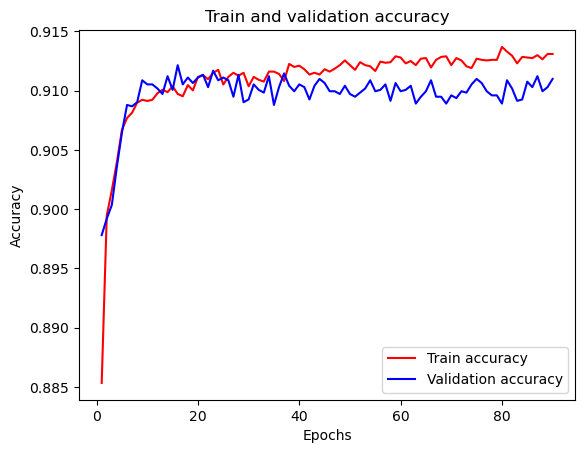

In [25]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'r', label='Train accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# evaluate model performance on test set
bin_model.evaluate(X_test, y_test)

387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - accuracy: 0.9090 - loss: 0.1950


[0.20223312079906464, 0.9070972204208374]

In [27]:
# predict the output label for a particular sample from the test set (X_test[11]) and compare it with the actual value (y_test)
x_ex = X_test[11,:]
y_pred=bin_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])
print(y_test.head(12))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[0.00016293]
38865    0
28259    0
16427    0
701      0
20210    0
27779    0
21178    0
11641    0
34829    0
6629     1
8534     0
18720    0
Name: binY, dtype: int64


In [28]:
# evaluate the performance of binary classification model after training
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# probability and label prediction
y_prob = bin_model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

recall1 = recall_score(y_test, y_pred, average='weighted')
precision1 = precision_score(y_test, y_pred, average='weighted')
weighted_accuracy1 = accuracy_score(y_test, y_pred)
auc1 = roc_auc_score(y_test, y_prob)

print(f'Recall : {recall1}')
print(f'Precision : {precision1}')
print(f'Weighted Accuracy : {weighted_accuracy1}')
print(f'AUC : {auc1}')

387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step
Recall : 0.9070971918750506
Precision : 0.8962990106226956
Weighted Accuracy : 0.9070971918750506
AUC : 0.9254699841711611


In [29]:
# advanced deep learning (neural network) models with multiple layers and additional overfitting mitigation mechanisms such as regularization and dropout.
from keras.layers import Dropout, Dense, Input
from keras.models import Sequential
from keras import regularizers

bin_model2 = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [30]:
bin_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from keras.optimizers import Adam

custom_optimizer = Adam(learning_rate=0.001)
bin_model2.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
history = bin_model2.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_val, y_val))
history_dict2 = history.history

Epoch 1/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.8926 - loss: 0.3764 - val_accuracy: 0.9079 - val_loss: 0.2531
Epoch 2/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.9019 - loss: 0.2629 - val_accuracy: 0.9021 - val_loss: 0.2765
Epoch 3/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.9091 - loss: 0.2432 - val_accuracy: 0.9058 - val_loss: 0.2509
Epoch 4/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.9084 - loss: 0.2390 - val_accuracy: 0.9051 - val_loss: 0.2531
Epoch 5/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.9108 - loss: 0.2274 - val_accuracy: 0.9094 - val_loss: 0.2254
Epoch 6/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.9121 - loss: 0.2277 - val_accuracy: 0.9089 - val_loss: 0.2233
Epoch 7/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.9039 - loss: 0.2313 - val_accuracy: 0.9091 - val_loss: 0.2243
Epoch 8/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 

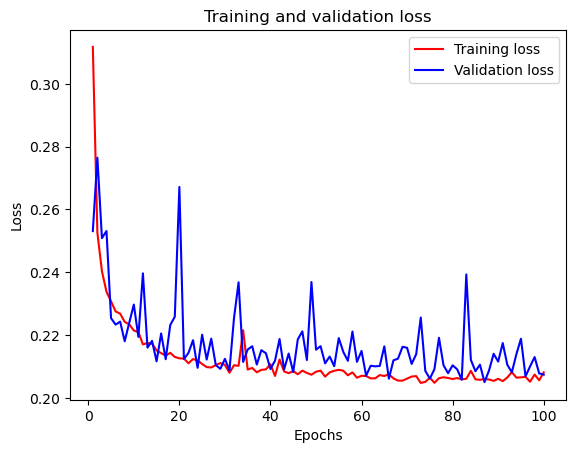

In [33]:
loss_values = history_dict2['loss']
val_loss_values = history_dict2['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

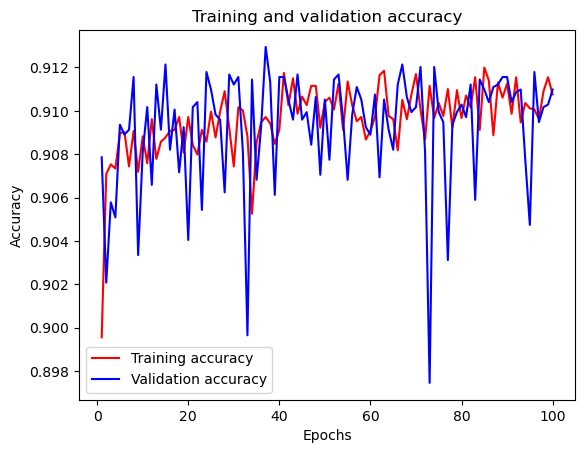

In [34]:
plt.clf()
acc_values = history_dict2['accuracy']
val_acc_values = history_dict2['val_accuracy']
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
bin_model2.evaluate(X_test, y_test)

387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.9088 - loss: 0.1999


[0.20575514435768127, 0.9065307378768921]

In [36]:
x_ex = X_test[11,:]
y_pred=bin_model2.predict(x_ex.reshape(1,-1))
print(y_pred[0])
print(y_test.head(12))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0.00062579]
38865    0
28259    0
16427    0
701      0
20210    0
27779    0
21178    0
11641    0
34829    0
6629     1
8534     0
18720    0
Name: binY, dtype: int64


In [37]:
y_prob = bin_model2.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

recall2 = recall_score(y_test, y_pred, average='weighted')
precision2 = precision_score(y_test, y_pred, average='weighted')
weighted_accuracy2 = accuracy_score(y_test, y_pred)
auc2 = roc_auc_score(y_test, y_prob)

print(f'Recall : {recall2}')
print(f'Precision : {precision2}')
print(f'Weighted Accuracy : {weighted_accuracy2}')
print(f'AUC : {auc2}')

387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
Recall : 0.9065307113377034
Precision : 0.895299954260386
Weighted Accuracy : 0.9065307113377034
AUC : 0.9298016546902107


In [38]:
results = pd.DataFrame({'Metric': ['Recall', 'Precision', 'Weighted Accuracy', 'AUC'],
                        'Model 1': [recall1, precision1, weighted_accuracy1, auc1],
                        'Model 2': [recall2, precision2, weighted_accuracy2, auc2]})

print(results)

              Metric   Model 1   Model 2
0             Recall  0.907097  0.906531
1          Precision  0.896299  0.895300
2  Weighted Accuracy  0.907097  0.906531
3                AUC  0.925470  0.929802


# Задание 2


In [40]:
data2 = pd.read_csv('fetal_health.csv')

In [41]:
print(f"Размерность: {data2.shape}")

Размерность: (2126, 22)


In [42]:
# Выделение первых 5 и последних 5 записей
first_5 = data2.head(5)
last_5 = data2.tail(5)

print("Первые 5 записей:")
display(first_5.style)
print("Последние 5 записей:")
display(last_5.style)

Первые 5 записей:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.500000,43.000000,2.400000,64.000000,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,2.000000
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.000000,0.000000,17.000000,2.100000,0.000000,10.400000,130.000000,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,1.000000
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.100000,0.000000,13.400000,130.000000,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,1.000000
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.400000,0.000000,23.000000,117.000000,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,1.000000
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.000000,0.000000,16.000000,2.400000,0.000000,19.900000,117.000000,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,1.000000


Последние 5 записей:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.000000,0.000000,0.000000,0.007000,0.000000,0.000000,0.000000,79.000000,0.200000,25.000000,7.200000,40.000000,137.000000,177.000000,4.000000,0.000000,153.000000,150.000000,152.000000,2.000000,0.000000,2.000000
2122,140.000000,0.001000,0.000000,0.007000,0.000000,0.000000,0.000000,78.000000,0.400000,22.000000,7.100000,66.000000,103.000000,169.000000,6.000000,0.000000,152.000000,148.000000,151.000000,3.000000,1.000000,2.000000
2123,140.000000,0.001000,0.000000,0.007000,0.000000,0.000000,0.000000,79.000000,0.400000,20.000000,6.100000,67.000000,103.000000,170.000000,5.000000,0.000000,153.000000,148.000000,152.000000,4.000000,1.000000,2.000000
2124,140.000000,0.001000,0.000000,0.006000,0.000000,0.000000,0.000000,78.000000,0.400000,27.000000,7.000000,66.000000,103.000000,169.000000,6.000000,0.000000,152.000000,147.000000,151.000000,4.000000,1.000000,2.000000
2125,142.000000,0.002000,0.002000,0.008000,0.000000,0.000000,0.000000,74.000000,0.400000,36.000000,5.000000,42.000000,117.000000,159.000000,2.000000,1.000000,145.000000,143.000000,145.000000,1.000000,0.000000,1.000000


In [43]:
data2.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [44]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [45]:
data2.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [46]:
print(f"fetal_health {data2['fetal_health'].unique()}")

fetal_health [2. 1. 3.]


In [47]:
X = data2.drop(['fetal_health'], axis=1)
y = data2['fetal_health']

In [48]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2,random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}')
print(f'Validation : {X_val.shape}')
print(f'Test : {X_test.shape}')

Train : (1360, 21)
Validation : (340, 21)
Test : (426, 21)


In [50]:
y_train

1892    1.0
842     1.0
306     2.0
207     1.0
1359    1.0
       ... 
772     2.0
1805    1.0
35      1.0
1398    1.0
1678    1.0
Name: fetal_health, Length: 1360, dtype: float64

In [51]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [52]:
y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [53]:
multi_model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(16, activation='relu'),      
    Dense(4, activation='softmax')    
])

In [54]:
multi_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
history = multi_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=10)
history_dict3 = history.history

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.3646 - loss: 1.3799 - val_accuracy: 0.7794 - val_loss: 0.7805
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7799 - loss: 0.6846 - val_accuracy: 0.7794 - val_loss: 0.5773
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.7764 - loss: 0.5689 - val_accuracy: 0.7882 - val_loss: 0.4996
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.7958 - loss: 0.4928 - val_accuracy: 0.7971 - val_loss: 0.4489
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8285 - loss: 0.4026 - val_accuracy: 0.8412 - val_loss: 0.4046
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8373 - loss: 0.4007 - val_accuracy: 0.8324 - val_loss: 0.3758
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8520 - loss: 0.3599 - val_accuracy: 0.8412 - val_loss: 0.3564
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8511 - loss: 0.3731 - 

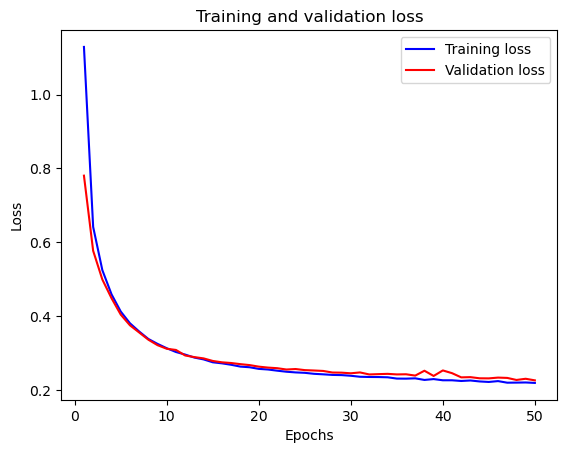

In [56]:
loss_values = history_dict3['loss']
val_loss_values = history_dict3['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

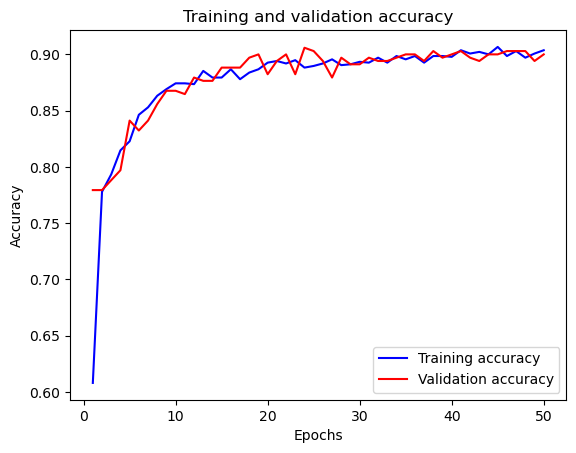

In [57]:
plt.clf()
acc_values = history_dict3['accuracy']
val_acc_values = history_dict3['val_accuracy']
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
multi_model.evaluate(X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8975 - loss: 0.2592


[0.26735416054725647, 0.8849765062332153]

In [59]:
y_test[1]

array([0., 1., 0., 0.])

In [60]:
x_ex = X_test[1,:]
y1 = min_max_scaler.inverse_transform(x_ex.reshape(1, -1))
print(y1)
y_pred=multi_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])

[[1.31e+02 1.00e-02 0.00e+00 3.00e-03 1.00e-03 0.00e+00 0.00e+00 5.40e+01
  1.40e+00 0.00e+00 3.30e+00 8.50e+01 8.40e+01 1.69e+02 7.00e+00 0.00e+00
  1.51e+02 1.43e+02 1.47e+02 2.00e+01 1.00e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[1.5098870e-07 9.9980301e-01 1.9560561e-04 1.3427964e-06]


In [61]:
y_pred = multi_model.predict(X_test)
print(y_pred)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
[[1.4594068e-05 6.4203508e-02 9.0029562e-01 3.5486240e-02]
 [1.5098868e-07 9.9980295e-01 1.9560559e-04 1.3427963e-06]
 [2.5566094e-05 9.8591328e-01 1.3619876e-02 4.4115668e-04]
 ...
 [1.0042123e-06 9.9783063e-01 2.0712621e-03 9.7186159e-05]
 [1.2430786e-06 9.9920875e-01 7.6457136e-04 2.5479078e-05]
 [5.7388665e-06 9.9914575e-01 2.7249908e-04 5.7599304e-04]]


In [62]:
y_test

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [63]:
from sklearn.metrics import recall_score

# Преобразуйте вероятности в предсказанные метки (классы)
y_pred_classes = y_pred.argmax(axis=-1)

# Вычислите recall для каждого класса
recall_per_class1 = recall_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите precision для каждого класса
precision_per_class1 = precision_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите взвешенную точность
weighted_accuracy1 = accuracy_score(y_test.argmax(axis=-1), y_pred_classes)


print("Recall per class:", recall_per_class1)
print("Precision per class:", precision_per_class1)
print("Weighted Accuracy:", weighted_accuracy1)

Recall per class: [0.93072289 0.72881356 0.71428571]
Precision per class: [0.95076923 0.62318841 0.78125   ]
Weighted Accuracy: 0.8849765258215962


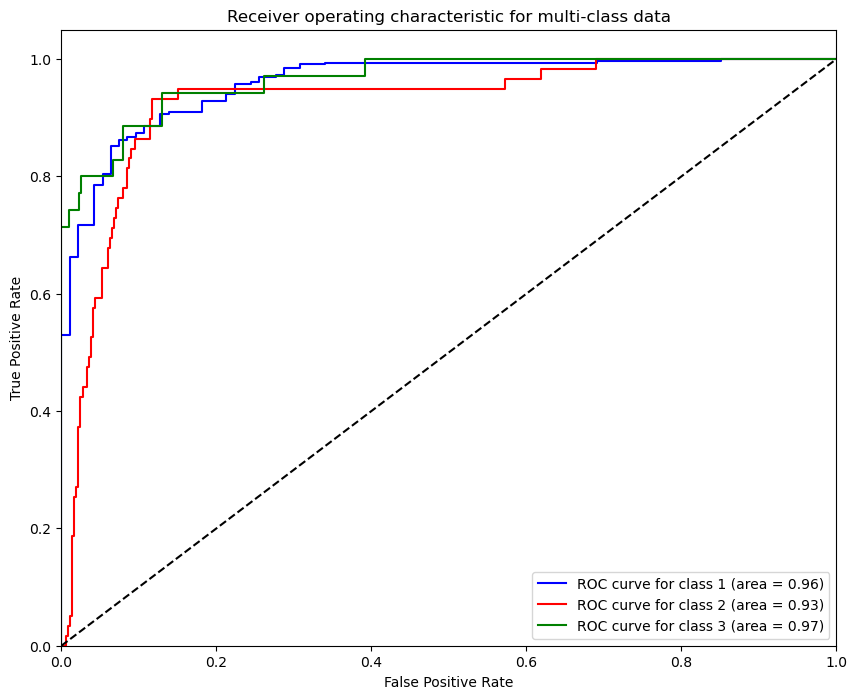

{1: 0.9595616508587541, 2: 0.9250450284025309, 3: 0.9658019729630983}


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

fpr = []
tpr = []
roc_auc = []

auc_score = {}

for i in range(1, 4):
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train[:, i])    

    prob_test_vec = clf.predict_proba(X_test)
    
    fpr_i, tpr_i, _ = roc_curve(y_test[:, i], prob_test_vec[:, 1])
    auc_value = auc(fpr_i, tpr_i)
    
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(auc_value)

    auc_score[i] = auc_value

# Визуализируйте ROC-кривые для каждого класса
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow']
for i, color in zip(range(1, 4), colors):  
    plt.plot(fpr[i-1], tpr[i-1], color=color,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i-1]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

print(auc_score)

In [65]:
data2 = pd.read_csv('fetal_health.csv')
# Разделим данные на обучающую, тестовую и валидационную выборки

X = data2.drop(['fetal_health'], axis=1)  # Признаки, за исключением целевой переменной fetal_health
y = data2['fetal_health']  # Целевая переменная fetal_health

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.8, random_state=0)

print(f'Train: {X_train.shape}')
print(f'Validation: {X_val.shape}')
print(f'Test: {X_test.shape}')

#unique_classes = np.unique(y_train)
#num_classes = len(unique_classes)
#print(f'unique_classes: {unique_classes}')
#print(f'num_classes: {num_classes}')

y_train

Train: (1700, 21)
Validation: (85, 21)
Test: (341, 21)


2009    1.0
1820    1.0
1550    1.0
377     1.0
1407    1.0
       ... 
563     1.0
1985    1.0
1696    1.0
702     3.0
564     1.0
Name: fetal_health, Length: 1700, dtype: float64

In [66]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [67]:
multi_model2 = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),      
    Dense(32, activation='relu'),     
    Dense(16, activation='relu'),     
    Dense(4, activation='softmax')     
])

In [68]:
from tensorflow.keras.optimizers import RMSprop
# Компиляция модели с оптимизатором RMSprop
optimizer = RMSprop(learning_rate=0.001)
multi_model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
history = multi_model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=10)
history_dict4 = history.history

Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.7640 - loss: 0.8610 - val_accuracy: 0.7765 - val_loss: 0.4828
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8166 - loss: 0.4172 - val_accuracy: 0.8706 - val_loss: 0.3741
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8557 - loss: 0.3276 - val_accuracy: 0.8588 - val_loss: 0.3622
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.8741 - loss: 0.2916 - val_accuracy: 0.8706 - val_loss: 0.3657
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8757 - loss: 0.2768 - val_accuracy: 0.8941 - val_loss: 0.3546
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.8829 - loss: 0.2557 - val_accuracy: 0.8941 - val_loss: 0.3343
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8760 - loss: 0.2693 - val_accuracy: 0.9059 - val_loss: 0.3426
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8911 - loss: 0.2659 - 

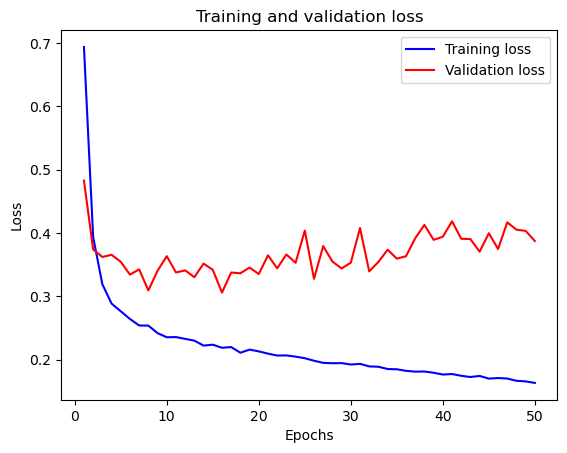

In [70]:
loss_values = history_dict4['loss']
val_loss_values = history_dict4['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

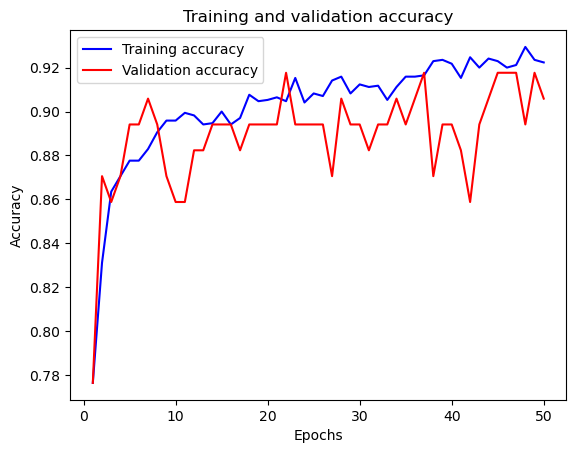

In [71]:
plt.clf()
acc_values = history_dict4['accuracy']
val_acc_values = history_dict4['val_accuracy']
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
multi_model2.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.8885 - loss: 0.3242


[0.255679726600647, 0.8914955854415894]

In [73]:
y_test[1]

array([0., 1., 0., 0.])

In [74]:
x_ex = X_test[1,:]
y1 = min_max_scaler.inverse_transform(x_ex.reshape(1, -1))
print(y1)
y_pred=multi_model2.predict(x_ex.reshape(1,-1))
print(y_pred[0])

[[1.22e+02 0.00e+00 0.00e+00 7.00e-03 7.00e-03 0.00e+00 0.00e+00 2.10e+01
  1.90e+00 0.00e+00 5.60e+00 7.30e+01 7.70e+01 1.50e+02 3.00e+00 2.00e+00
  1.27e+02 1.15e+02 1.17e+02 3.00e+01 0.00e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[4.4122448e-08 9.9997640e-01 2.3585661e-05 5.4203156e-08]


In [75]:
y_pred = multi_model2.predict(X_test)
print(y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
[[2.2366573e-06 7.4732757e-01 2.5246179e-01 2.0850863e-04]
 [4.4122451e-08 9.9997646e-01 2.3585662e-05 5.4203159e-08]
 [6.9425158e-05 6.4742482e-01 3.3871019e-01 1.3795483e-02]
 ...
 [6.9609215e-14 1.0000000e+00 8.4111423e-10 4.7823764e-15]
 [1.2529830e-05 2.3243943e-02 8.9217085e-01 8.4572837e-02]
 [1.3570423e-13 2.7915326e-09 8.3005725e-06 9.9999166e-01]]


In [76]:
from sklearn.metrics import recall_score

# Преобразуйте вероятности в предсказанные метки (классы)
y_pred_classes = y_pred.argmax(axis=-1)

# Вычислите recall для каждого класса
recall_per_class2 = recall_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите precision для каждого класса
precision_per_class2 = precision_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите взвешенную точность
weighted_accuracy2 = accuracy_score(y_test.argmax(axis=-1), y_pred_classes)


print("Recall per class:", recall_per_class2)
print("Precision per class:", precision_per_class2)
print("Weighted Accuracy:", weighted_accuracy2)

Recall per class: [0.89849624 0.87234043 0.85714286]
Precision per class: [0.98353909 0.57746479 0.88888889]
Weighted Accuracy: 0.8914956011730205


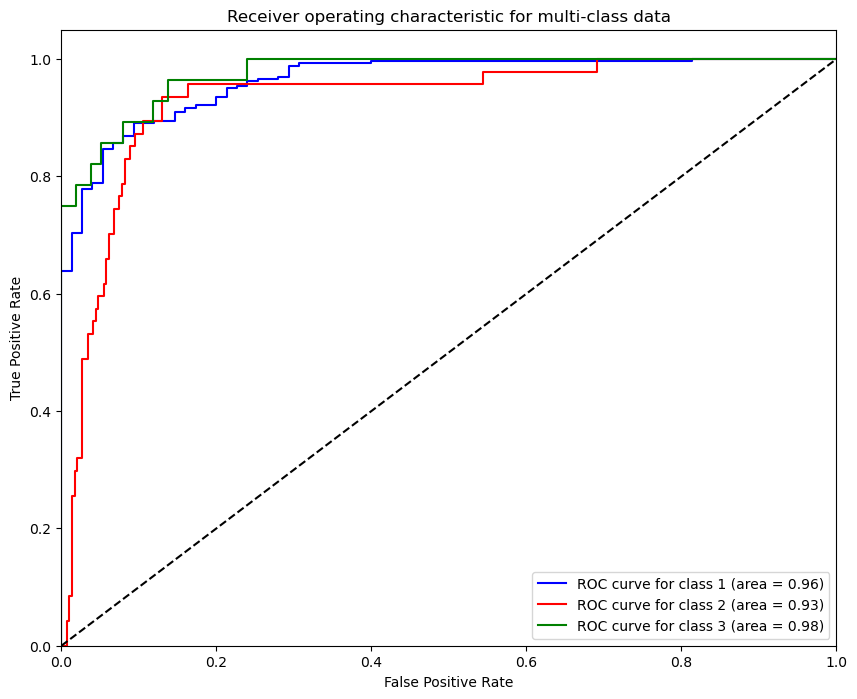

{1: 0.9633082706766917, 2: 0.929656969170647, 3: 0.9755819260611593}


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

fpr = []
tpr = []
roc_auc = []

auc_score = {}

for i in range(1, 4):  
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train[:, i])
    
    prob_test_vec = clf.predict_proba(X_test)

    fpr_i, tpr_i, _ = roc_curve(y_test[:, i], prob_test_vec[:, 1])
    auc_value = auc(fpr_i, tpr_i)

    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(auc_value)

    auc_score[i] = auc_value

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow']
for i, color in zip(range(1, 4), colors):
    plt.plot(fpr[i-1], tpr[i-1], color=color,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i-1]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

print(auc_score)

# Задание 3


In [142]:
data3 = pd.read_csv('day.csv')
print(f"Размерность: {data3.shape}")

Размерность: (731, 16)


In [144]:
first_5 = data3.head(5)
last_5 = data3.tail(5)

print("Первые 5 записей:")
display(first_5.style)

print("Последние 5 записей:")
display(last_5.style)

Первые 5 записей:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Последние 5 записей:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [146]:
data3.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [148]:
data3.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [150]:
#X = data3.drop(columns = ['instant', 'dteday', 'casual', 'registered', 'cnt'])
X = data3.drop(columns = ['instant', 'dteday', 'cnt'])
y = data3['cnt']

In [152]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}')
print(f'Validation : {X_val.shape}')
print(f'Test : {X_test.shape}')

Train : (467, 13)
Validation : (117, 13)
Test : (147, 13)


In [181]:
from keras.models import Sequential
from keras.layers import Dense
reg_model = Sequential()
reg_model.add(Input(shape=(X_train.shape[1],))) 
reg_model.add(Dense(64, activation='relu'))
reg_model.add(Dense(32, activation='relu'))
reg_model.add(Dense(1))

In [183]:
reg_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [187]:
history = reg_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=350, batch_size=30)
history_dict = history.history

Epoch 1/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23932394.0000 - mae: 4491.8369 - val_loss: 22472082.0000 - val_mae: 4405.7065
Epoch 2/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24931858.0000 - mae: 4587.9790 - val_loss: 22458560.0000 - val_mae: 4404.2476
Epoch 3/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23644002.0000 - mae: 4457.2661 - val_loss: 22432302.0000 - val_mae: 4401.4072
Epoch 4/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25442750.0000 - mae: 4657.9072 - val_loss: 22384146.0000 - val_mae: 4396.2026
Epoch 5/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23864122.0000 - mae: 4465.6313 - val_loss: 22302790.0000 - val_mae: 4387.4404
Epoch 6/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24429638.0000 - mae: 4551.0332 - val_loss: 22175428.0000 - val_mae: 4373.9199
Epoch 7/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22734972.0000 - mae: 4391.3286 - val_loss: 21993784.0000 - val_mae: 4354.5498
Epoch 8/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s

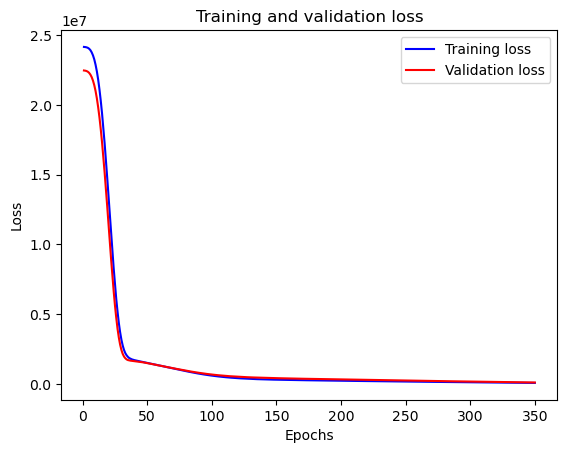

In [189]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

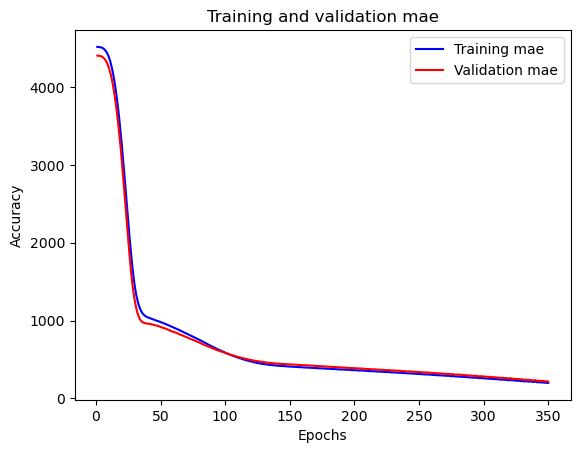

In [191]:
plt.clf()
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'b', label='Training mae')
plt.plot(epochs, val_acc_values, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [193]:
reg_model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72461.3281 - mae: 201.2704  


[71268.9765625, 203.73287963867188]

In [195]:
y_test

196    5923
187    4592
14     1248
31     1360
390    4075
       ... 
566    5870
688    5499
266    5423
504    8294
239    4334
Name: cnt, Length: 147, dtype: int64

In [197]:
x_ex = X_test[1,:]
y_pred=reg_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[4841.0117]


In [201]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = reg_model.predict(X_test)  # X_test - тестовые данные
y_true = y_test  # y_test - фактические значения тестовых данных

# Вычисление MSE
mse1 = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse1}')

# Вычисление MAE
mae1 = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae1}')

# Вычисление R^2
r2_1 = r2_score(y_true, y_pred)
print(f'R-squared (R^2): {r2_1}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
Mean Squared Error (MSE): 71268.9789319697
Mean Absolute Error (MAE): 203.73287050415868
R-squared (R^2): 0.9832432199291539


In [235]:
reg_model2 = Sequential()
reg_model2.add(Input(shape=(X_train.shape[1],))) 
reg_model2.add(Dense(96, activation='relu'))
reg_model2.add(Dense(64, activation='relu'))
reg_model2.add(Dense(32, activation='relu'))
reg_model2.add(Dense(1))


In [237]:
reg_model2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 96)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,665 (37.75 KB)

 Trainable params: 9,665 (37.75 KB)

 Non-trainable params: 0 (0.00 B)

In [239]:
reg_model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [241]:
history = reg_model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=550, batch_size=55)
history_dict = history.history

Epoch 1/550
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 25402040.0000 - mae: 4653.0293 - val_loss: 22475002.0000 - val_mae: 4405.9927
Epoch 2/550
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24250754.0000 - mae: 4537.8789 - val_loss: 22466076.0000 - val_mae: 4405.0005
Epoch 3/550
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24031692.0000 - mae: 4481.0884 - val_loss: 22448098.0000 - val_mae: 4403.0283
Epoch 4/550
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23493048.0000 - mae: 4451.8804 - val_loss: 22414084.0000 - val_mae: 4399.3062
Epoch 5/550
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24557750.0000 - mae: 4541.2222 - val_loss: 22351024.0000 - val_mae: 4392.4233
Epoch 6/550
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24654884.0000 - mae: 4578.1353 - val_loss: 22238178.0000 - val_mae: 4380.3345
Epoch 7/550
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23672744.0000 - mae: 4473.5903 - val_loss: 22046700.0000 - val_mae: 4359.8687
Epoch 8/550
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

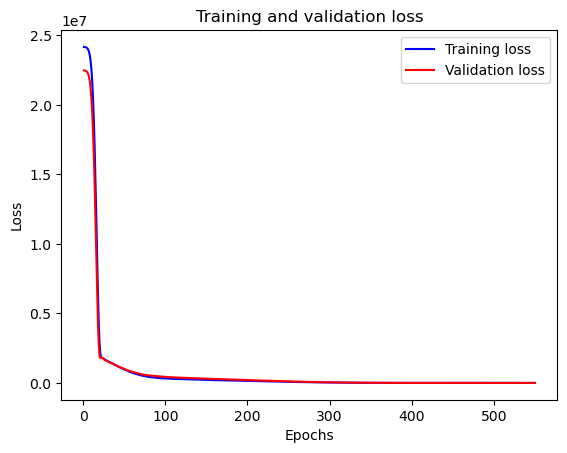

In [243]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

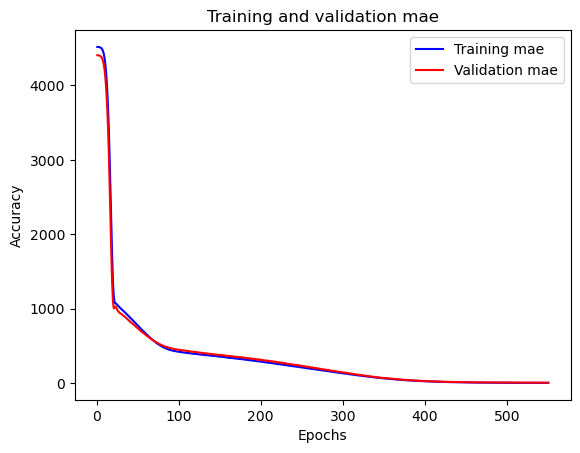

In [245]:
plt.clf()
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'b', label='Training mae')
plt.plot(epochs, val_acc_values, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [247]:
reg_model2.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35.0525 - mae: 2.4454


[41.554019927978516, 2.4618282318115234]

In [249]:
y_test

196    5923
187    4592
14     1248
31     1360
390    4075
       ... 
566    5870
688    5499
266    5423
504    8294
239    4334
Name: cnt, Length: 147, dtype: int64

In [251]:
x_ex = X_test[1,:]
y_pred=reg_model2.predict(x_ex.reshape(1,-1))
print(y_pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[4592.5474]


In [253]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = reg_model2.predict(X_test)  # X_test - тестовые данные
y_true = y_test  # y_test - фактические значения тестовых данных

# Вычисление MSE
mse2 = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse2}')

# Вычисление MAE
mae2 = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae2}')

# Вычисление R^2
r2_2 = r2_score(y_true, y_pred)
print(f'R-squared (R^2): {r2_2}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
Mean Squared Error (MSE): 41.554019968906026
Mean Absolute Error (MAE): 2.4618281150350767
R-squared (R^2): 0.9999902298084788


Model Evaluation Results:
  Metric        Model 1        Model 2
0    MSE  821335.375952  817722.212263
1    MAE     683.258079     682.370210
2    R^2       0.806887       0.807737


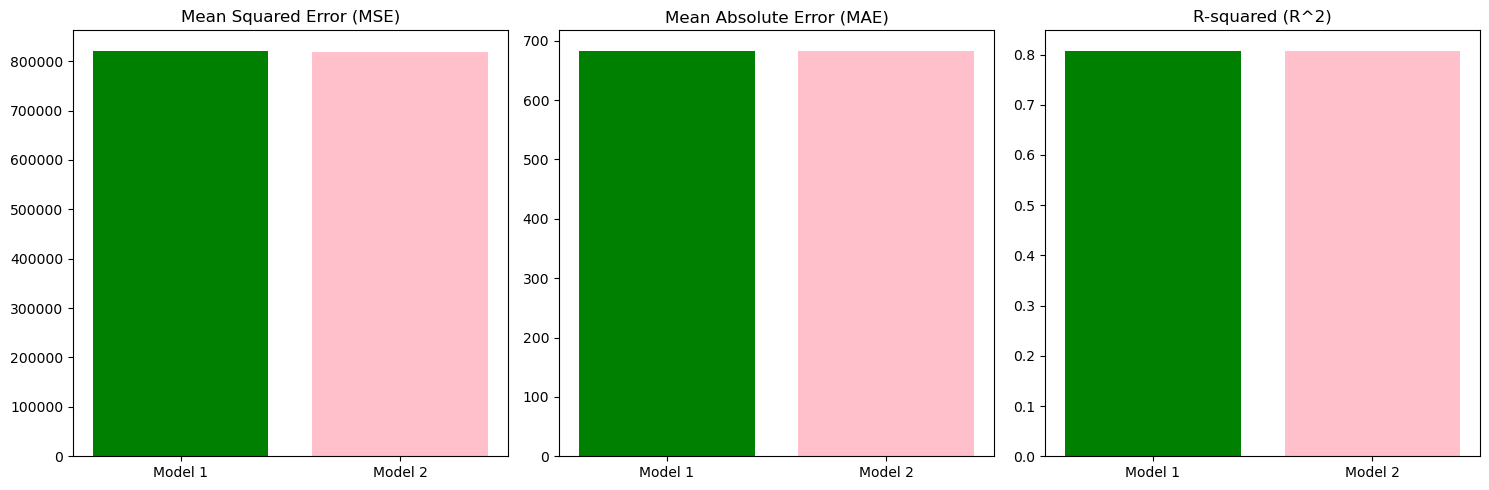

In [213]:
# Создание DataFrame для отображения результатов
results = pd.DataFrame({'Metric': ['MSE', 'MAE', 'R^2'],
                        'Model 1': [mse1, mae1, r2_1],
                        'Model 2': [mse2, mae2, r2_2]})

mse = [mse1, mse2]
mae = [mae1, mae2]
r2 = [r2_1, r2_2]

colors = ['green', 'pink']
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(['Model 1', 'Model 2'], mse, color=colors)
plt.title('Mean Squared Error (MSE)')

plt.subplot(132)
plt.bar(['Model 1', 'Model 2'], mae, color=colors)
plt.title('Mean Absolute Error (MAE)')

plt.subplot(133)
plt.bar(['Model 1', 'Model 2'], r2, color=colors)
plt.title('R-squared (R^2)')

plt.tight_layout()

print("Model Evaluation Results:")
print(results)
plt.show()